In [3]:
import ibmos2spark

# @hidden_cell
credentials = {
    'endpoint': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'api_key': 'X27PCVzm5l3hnaooMRzucNIJUxVhMYbYW6SM_kvbnfxE',
    'service_id': 'iam-ServiceId-be05bfd6-e219-4cc0-b141-ba97ab3ef03b',
    'iam_service_endpoint': 'https://iam.ng.bluemix.net/oidc/token'}

configuration_name = 'os_15d3f29178884791a701d75dcb3985f0_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Bus 118-S: Final Report 

## Team: Quadrapod




## Table of Contents: 


### Part 1: What day of the week do people write the most reviews?
* Section 1: Converting date into day of the week
* Section 2: Export total reviews' dataframe
* Section 2a Create a function to convert dayofweek into integers
* Section 2b: Result for question number 1


### Part 2: What day of the week do people write the most tips? 
* Section 1: Convert date to day of the week
* Section 1a: Export total tips' dataframe
* Section 2: Reusult for Number of tips


### Part 3a: Visualizing data of review and tips
* Section 1: Convert days to integers 


### Part 3: Compare the distributions for the writing patterns across the days of the week, are they different for tips and reviews?
* Section 1: Visuals for tips and reviews
* Section 2: Tableau Graph for Reviews vs Tips (2009 - 2017)


### Part 4: Are the patterns different across business categories?
* Section 1: Total business cateogires
* Section 2: Explode, take out categories
* Section 3: Extracting all three business categories 
* Section 4: Creating and joining tables
* Section 4a: Export reviews' dataframe for five categories
* Section 5: Restaurant Reviews
* Section 6: Joining tips to businesses
* Section 6a: Export tips' dataframe for five categories
* Section 6b: Print number of tips
* Section 6c: Reviews and Tips comparison
* Section 7: Setting x-axis and y-axis for Restaurant
* Section 7a:Tableau Graphs for Restaurants Reviews vs Tips (2009 - 2017)
* Section 8: Aggregate Yelp user written Shopping reviews
* Section 8a: Aggregate Yelp user written Shopping tips
* Section 8b: Setting x-axis and y-axis for Shopping
* Section 8c: Tableau Graphs for Shopping Reviews vs Tips (2009 - 2017)
* Section 9:  Aggregate Automotive Yelp user written review days to integers
* Section 9a: Aggregate Automotive Yelp user written tip days to integers 
* Section 9b: Setting x-axis and y-axis for Automotive
* Section 9c: Tableau Graphs for Automotive Reviews and Tips
* Section 10: Tableau Graphs for Nightlife Reviews vs Tips
* Section 11: Tableau Graphs for Beauty&Spa Reviews vs Tips
* Section 12: Comparing business reviews and tips' distribution side by side
* Section 13: Filter Nightlife Reviews (sanity check)
* Section 13a: Filter Restaurants Reviews (sanity check) 
* Section 14: Creating and joining tables: Nightlife and Restaurant reviews
* Section 14a: Checking amount of reviews in overlapping businesses
* Section 14b: Percentage of overlapping reviews: Restaurant & Nightlife
* Section 14c: Result of overlapping data: Nightlife and Restaurants
* Section 15: Extract Shopping data
* Section 15a: Extract Beauty & Spa data 
* Section 15b: Creating and joining tables: Shopping and Beauty and Spa
* Section 15c: Find the number of overlapping reviews using business_id of overlapping businesses
* Section 15d: Percentage of overlapping reviews: Shopping and Beauty & Spa
* Section 15e: Result of overlapping data: Shopping and Beauty & Spa


### Part 5: Analysis and Limitations

## Executive Summary: 
This project is to analyze data retrieved from Yelp dataset challenge (link: https://www.yelp.com/dataset/challenge). Our team is to answer the following question: What day of the week do people write the most reviews, What day of the week do people write the most tips, Compare the distributions for the writing patterns across the days of the week, are they different for tips and reviews, Are the patterns different across business categories?

The five categories that are chosen are Shopping, Restaurants, Nightlife, Beauty and Spas, and Automotive businesses

We will take a look at the top 4 most reviewed businesses, Shopping, Restaurants, Nightlife, Beauty and Spas. According to the Yelp-10K form, the 4 businesses we've chosen are the top most reviewed categories. However, we decided to incorporate Automotive businesses to conduct our research is because North America relies heavily on automovies.

After we have obtained data from business and associated review data from each category, and categorize it as "number of reviews" and "number of tips"

Upon obtaining above data, from there, we will create graphs for each individual __Review__ and __Tips__ per businesses, including tracking distributions throughout the week as described in the need. 

To further analyze our data, we will use __Tableau Visuals__ to create more visually-pleasing visualization for readers while ensuring the accuracy of the data to align with our study. __All Tableau graphs will be included starting Section 8c to Section 15e__. 

Tableau graphs will be included underneath the original Matplot graphs. Each Tableau graphs are only using data from 2009 to 2017. The reason behind us only using data from 2009 to 2017, is because Tips was implemented at the year of 2009, however, the __Review__ feature was available from the launch of Yelp.com, in 2004. Thus, by using reviews written from 2004 ~ 2009 for total of reviews, would provide us inaccurate comparison across distribution between Reviews and Tips. 

Lastly, to dig deeper into our research, we want to see if implementing Tips has any effects on the number of Reviews written throughout the week. We will confirm this, after we obtained appropriate data and demonstrate through Tableau graphs. We will conclude this study with analysis and limitations we encountered throughout the project. 

The initial assumption is that distributions will be widely spread for both reviews and tips, and increase over time. We will confirm this after we obtain the needed data from each category and demonstration from graphs. 


## Part 1. What day of the week do people write the most reivews?

We are interested in finding out the distribution in which day of the week did people wrote the review. 
To be able to answer this question, we first need to go through the review data, in order to get the specific date of the review that was written, and recorded into the Yelp database. After we retrieved the date from review data, we will then be able to determine the specific amount of review written across the week. 

In [4]:
path_review = cos.url('review.json.bz2', 'spring2018billa404fbc485bf4bc387df212faa9b9403')
df_review = spark.read.json(path_review)
print "Total number of reviews", df_review.count()
df_review.printSchema()

Total number of reviews 5261669
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: long (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



### Section 1: Converting date into day of the week

Since we are interested in the day that the review was written by Yelp users across the week, and our data was in date. We will convert the date that was retrieved from review data into the exact day of the week. The purpose of this is to answer our question of what day of the week does Yelp users write the most review. 



In [5]:
def get_weekday(date):
    import datetime
    import calendar
    year, month, day = (int(x) for x in date.split('-'))    
    weekday = datetime.date(year, month, day)
    return calendar.day_name[weekday.weekday()]

spark.udf.register('get_weekday', get_weekday)

In [6]:
df_review.createOrReplaceTempView("review_day")
df_review_date = spark.sql("""
SELECT business_id, review_id, user_id, date, get_weekday(date) AS Day_of_Week
FROM review_day
""")
df_review_date.show(10)


+--------------------+--------------------+--------------------+----------+-----------+
|         business_id|           review_id|             user_id|      date|Day_of_Week|
+--------------------+--------------------+--------------------+----------+-----------+
|0W4lkclzZThpx3V65...|v0i_UHJMo_hPBq9bx...|bv2nCi5Qv5vroFiqK...|2016-05-28|   Saturday|
|AEx2SYEUJmTxVVB18...|vkVSCC7xljjrAI4UG...|bv2nCi5Qv5vroFiqK...|2016-05-28|   Saturday|
|VR6GpWIda3SfvPC-l...|n6QzIUObkYshz4dz2...|bv2nCi5Qv5vroFiqK...|2016-05-28|   Saturday|
|CKC0-MOWMqoeWf6s-...|MV3CcKScW05u5LVfF...|bv2nCi5Qv5vroFiqK...|2016-05-28|   Saturday|
|ACFtxLv8pGrrxMm6E...|IXvOzsEMYtiJI0CAR...|bv2nCi5Qv5vroFiqK...|2016-05-28|   Saturday|
|s2I_Ni76bjJNK9yG6...|L_9BTb55X0GDtThi6...|bv2nCi5Qv5vroFiqK...|2016-05-28|   Saturday|
|8QWPlVQ6D-OExqXoa...|HRPm3vEZ_F-33TYVT...|_4iMDXbXZ1p1ONG29...|2014-09-24|  Wednesday|
|9_CGhHMz8698M9-Pk...|ymAUG8DZfQcFTBSOi...|u0LXt3Uea_GidxRW1...|2012-05-11|     Friday|
|gkCorLgPyQLsptTHa...|8UIishPUD9

### Section 2: Export total reviews' dataframe
Exporting data to draw Tableau Graphs <br>
<br>
The purpose for the following query is crucial before we use Tableau to visualize our data, we first need to export written review data for all categories

In [7]:
#df_total_review_out = df_review_date.repartition(1)
#path_out = cos.url('total_review_data_1.tsv', 'spring2018billa404fbc485bf4bc387df212faa9b9403')
#df_total_review_out.write.option("sep","\t").option("header","true").option("mode","overwrite").csv(path_out)

### Section 2a: Create a function to convert day of week into integers

We use this function to sort day of week from sunday to saturday

In [8]:
# returning day(string) into day(int)
def get_day_of_week(date):
    if date == "Monday":
        return 2
    elif date == "Tuesday":
        return 3
    elif date == "Wednesday":
        return 4
    elif date == "Thursday":
        return 5
    elif date == "Friday":
        return 6
    elif date == "Saturday":
        return 7
    else:
        return 1
    
spark.udf.register('get_day_of_week', get_day_of_week)

In [9]:
df_review_date.createOrReplaceTempView("df_review_date")

df_get_day_of_week = spark.sql("""
SELECT business_id, review_id, user_id, date, Day_of_Week, get_day_of_week(Day_of_Week) AS Int_Day_of_Week
FROM df_review_date
""")
df_get_day_of_week.show(10)

+--------------------+--------------------+--------------------+----------+-----------+---------------+
|         business_id|           review_id|             user_id|      date|Day_of_Week|Int_Day_of_Week|
+--------------------+--------------------+--------------------+----------+-----------+---------------+
|0W4lkclzZThpx3V65...|v0i_UHJMo_hPBq9bx...|bv2nCi5Qv5vroFiqK...|2016-05-28|   Saturday|              7|
|AEx2SYEUJmTxVVB18...|vkVSCC7xljjrAI4UG...|bv2nCi5Qv5vroFiqK...|2016-05-28|   Saturday|              7|
|VR6GpWIda3SfvPC-l...|n6QzIUObkYshz4dz2...|bv2nCi5Qv5vroFiqK...|2016-05-28|   Saturday|              7|
|CKC0-MOWMqoeWf6s-...|MV3CcKScW05u5LVfF...|bv2nCi5Qv5vroFiqK...|2016-05-28|   Saturday|              7|
|ACFtxLv8pGrrxMm6E...|IXvOzsEMYtiJI0CAR...|bv2nCi5Qv5vroFiqK...|2016-05-28|   Saturday|              7|
|s2I_Ni76bjJNK9yG6...|L_9BTb55X0GDtThi6...|bv2nCi5Qv5vroFiqK...|2016-05-28|   Saturday|              7|
|8QWPlVQ6D-OExqXoa...|HRPm3vEZ_F-33TYVT...|_4iMDXbXZ1p1ONG29...|

### Section 2b: Result for question number 1

This query is answered question number 1 as we seek know which day of the week has the most reviews written by Yelp users. By knowing the day of the week where there are most reviews, we can compare and contrast these numbers the patterns in Yelp's indvidual categories.

In [10]:
# Using sub-select to by pass the need of printing out unessary column in order to order day_of_week.
# order week of day, starting with sunday to saturday.
# matching with tableau
df_get_day_of_week.createOrReplaceTempView("df_get_day_of_week")
    
df_review_count_by_day = spark.sql("""
SELECT Day_of_Week,Int_Day_of_Week, COUNT(review_id) AS Number_of_Reviews
FROM df_get_day_of_week
GROUP BY Day_of_Week, Int_Day_of_Week
ORDER BY Int_Day_of_Week
""")

df_review_count_by_day.show()
print "From our result, we see that Sunday is when people write the most review."    

+-----------+---------------+-----------------+
|Day_of_Week|Int_Day_of_Week|Number_of_Reviews|
+-----------+---------------+-----------------+
|     Sunday|              1|           794745|
|     Monday|              2|           793559|
|    Tuesday|              3|           747057|
|  Wednesday|              4|           753938|
|   Thursday|              5|           712783|
|     Friday|              6|           709704|
|   Saturday|              7|           749883|
+-----------+---------------+-----------------+

From our result, we see that Sunday is when people write the most review.


## Part 2. What day of the week do people write the most tips?

To answer this question, we import the Yelp tip files, print the schema, and print total number of tips

After we retrieved the tips data, we will then be able to determine the specific amount of tips written across the week. 

In [11]:
path_tip = cos.url('tip.json.bz2', 'spring2018billa404fbc485bf4bc387df212faa9b9403')
df_tip = spark.read.json(path_tip)
print "Number of tips:", df_tip.count()
df_tip.printSchema()
df_tip.show(5)

Number of tips: 1098325
root
 |-- business_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- likes: long (nullable = true)
 |-- text: string (nullable = true)
 |-- user_id: string (nullable = true)

+--------------------+----------+-----+--------------------+--------------------+
|         business_id|      date|likes|                text|             user_id|
+--------------------+----------+-----+--------------------+--------------------+
|tJRDll5yqpZwehenz...|2012-07-15|    0|Get here early en...|zcTZk7OG8ovAmh_fe...|
|jH19V2I9fIslnNhDz...|2015-08-12|    0|Great breakfast l...|ZcLKXikTHYOnYt5VY...|
|dAa0hB2yrnHzVmsCk...|2014-06-20|    0|Nice place. Great...|oaYhjqBbh18ZhU0bp...|
|dAa0hB2yrnHzVmsCk...|2016-10-12|    0|Happy hour 5-7 Mo...|ulQ8Nyj7jCUR8M83S...|
|ESzO3Av0b1_TzKOiq...|2017-01-28|    0|Parking is a prem...|ulQ8Nyj7jCUR8M83S...|
+--------------------+----------+-----+--------------------+--------------------+
only showing top 5 rows



### Section 1: Convert date to day of the week

After we obtained the number of tips, the next is to answer and create a new table to ensure we have successfully converted tip date into the correct day of the week

In [12]:
df_tip.createOrReplaceTempView("tip_day")
df_tip_date = spark.sql("""
SELECT business_id, user_id, Day_of_Week, get_day_of_week(Day_of_Week) AS Int_Day_of_Week
    FROM (
        SELECT *, get_weekday(date) AS Day_of_Week
        FROM tip_day
    ) sub
""")

df_tip_date.show(5)

+--------------------+--------------------+-----------+---------------+
|         business_id|             user_id|Day_of_Week|Int_Day_of_Week|
+--------------------+--------------------+-----------+---------------+
|tJRDll5yqpZwehenz...|zcTZk7OG8ovAmh_fe...|     Sunday|              1|
|jH19V2I9fIslnNhDz...|ZcLKXikTHYOnYt5VY...|  Wednesday|              4|
|dAa0hB2yrnHzVmsCk...|oaYhjqBbh18ZhU0bp...|     Friday|              6|
|dAa0hB2yrnHzVmsCk...|ulQ8Nyj7jCUR8M83S...|  Wednesday|              4|
|ESzO3Av0b1_TzKOiq...|ulQ8Nyj7jCUR8M83S...|   Saturday|              7|
+--------------------+--------------------+-----------+---------------+
only showing top 5 rows



### Section 1a: Export total tips' dataframe
Exporting data to draw Tableau Graphs<br>
<br>
The purpose for the following query is crucial before we use Tableau to visualize our data, we first need to export written tip data for all categories

In [13]:
#df_total_tip_out = df_tip_date.repartition(1)
#path_out = cos.url('total_tip_data.tsv', 'spring2018billa404fbc485bf4bc387df212faa9b9403')
#df_total_tip_out.write.option("sep","\t").option("header","true").option("mode","overwrite").csv(path_out)

### Section 2: Reusult for Number of tips

To answer Question number two, we created a table that shows number of tips written by Yelp users throughout the week.
With this information, our assumption of data increasing over the day of week holds.

In [14]:
df_tip_date.createOrReplaceTempView("df_tip_date")
df_get_tip_date_of_week = spark.sql("""
SELECT *
FROM df_tip_date
""")
df_get_tip_date_of_week.count()

1098325

## Part 3a: Visualizing data of review and tips
The graphs below show distribution in patterns for both reviews and tips written by Yelp users. This is crucial and plays a vital part of the whole notebook because it serves as the main purpose of to show readers the writing patterns among reviews and tips from businesses throughout the week. 

To create the visualsin our notebook using the Python module matplotlib. The purpose and goal is to convert Monday - Sunday to integers of 1 - 7 accordingly. 

In [15]:
#Ask Python kernel to import pyplot from the already installed matplotlib module. 
#Using collect() method to collect the list of years instead of column in the DataFrame. 
from matplotlib import pyplot as plt

### Section 1: Showing total  number of reviews and tips for each weekday

In [16]:
df_get_tip_date_of_week.createOrReplaceTempView("df_get_tip_date_of_week")
df_tip_count_by_day  = spark.sql("""
SELECT Day_of_Week, Int_Day_of_Week, COUNT(user_id) AS Number_of_Tips
FROM df_get_tip_date_of_week
GROUP BY Day_of_Week, Int_Day_of_Week
ORDER BY Int_Day_of_Week
""")

df_tip_count_by_day.show()
print "From our result, we see that Saturday is when people write the most tip."


df_review_count_by_day.show()
print "From our result, we see that Sunday is when people write the most review."              

+-----------+---------------+--------------+
|Day_of_Week|Int_Day_of_Week|Number_of_Tips|
+-----------+---------------+--------------+
|     Sunday|              1|        173471|
|     Monday|              2|        131528|
|    Tuesday|              3|        133070|
|  Wednesday|              4|        136862|
|   Thursday|              5|        140394|
|     Friday|              6|        172665|
|   Saturday|              7|        210335|
+-----------+---------------+--------------+

From our result, we see that Saturday is when people write the most tip.
+-----------+---------------+-----------------+
|Day_of_Week|Int_Day_of_Week|Number_of_Reviews|
+-----------+---------------+-----------------+
|     Sunday|              1|           794745|
|     Monday|              2|           793559|
|    Tuesday|              3|           747057|
|  Wednesday|              4|           753938|
|   Thursday|              5|           712783|
|     Friday|              6|           709704|

##  Part 3. Comparing the distributions for the writing patterns across the days of the week, are they different for tips and reviews?

### Section 1: Visuals for tips and reviews

* Based on our NEED for this question, we wil set __Y-axis__ as the amount of REVIEWS and TIPS, and __X-axis__ as Monday - Sunday
* The integers on x-axis represents days in a week: 
Sunday = 1
Monday = 2
Tuesday = 3 
Wednesday = 4
Thursday = 5
Friday = 6
Saturday = 7

* The result we've received are widely spreaded, as reviews are mainly greater than 700,000, while the lowest being somewhere close to high 600,000 on Day 5 which is Friday

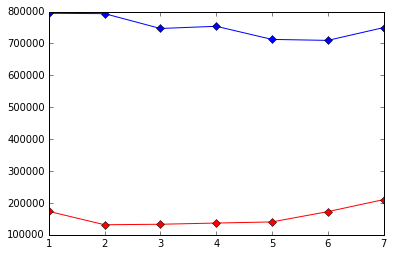

In [17]:
#x-asix
day_review_collection = df_review_count_by_day.select("Int_Day_of_Week").collect()
#y-asix
number_review_collection = df_review_count_by_day.select("Number_of_Reviews").collect()

#x-asix
day_tip_collection = df_tip_count_by_day.select("Int_Day_of_Week").collect()
#y-asix
number_tip_collection = df_tip_count_by_day.select("Number_of_Tips").collect()


plt.plot(day_review_collection, number_review_collection,\
         color='blue', marker='D', linestyle='solid')

plt.plot(day_tip_collection, number_tip_collection,\
         color='red', marker='D', linestyle='solid')

### Section 2: Tableau Graph for Reviews vs Tips (2009 - 2017)

* Based on our NEED for this question, we wanted to ensure we are using appropriate data, from 2009 - 2017 for Review and Tips 
* The integers on __Y-axis__ as amount of REVIEWS and Tips and __X-axis__ as Sunday - Monday
* The integers on x-axis represents days in a week: 
Sunday = 1
Monday = 2
Tuesday = 3
Wednesday = 4
Thursday = 5
Friday = 6
Saturday = 7

The result from the data we see a major difference in between the days Reviews and Tips were written.

From Reviews standpoint, we see that the peak of Reviews are during Sunday to Monday, there was a decline on Tuesday, but a rise on Wednesday. The decline occurs from Thursday to Friday, but an increase on Saturday.

From Tips standpoint, we see that the peak of Tips is on Friday and Saturday, with weekdays Monday to Thursday the lowest at almost a constant line after taking a drip from Sunday. 

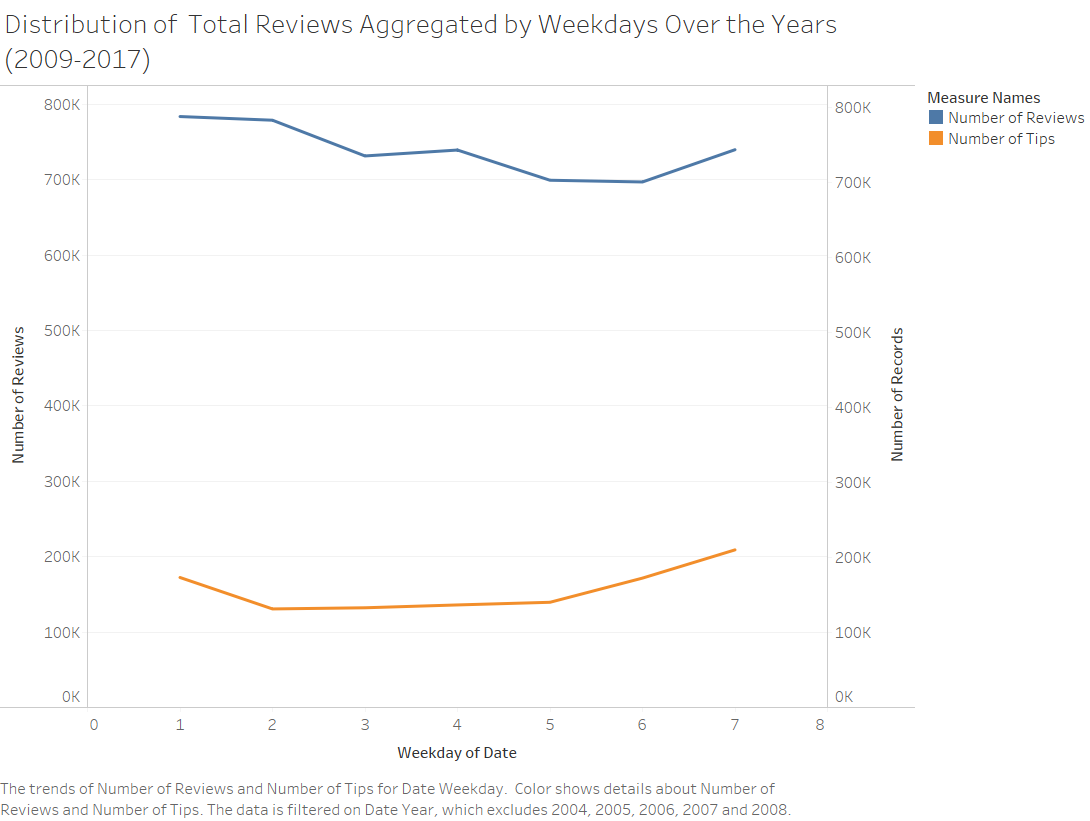

## Part 4. Are the patterns different across business categories?

To to answer this question, we are interested in understanding the amount of written *reviews* and *tips* across Yelp. To do this we need to first know the amount of total business categories across Yelp. 

### Section 1: Total business cateogires
To get the amount of total business cateogires: 
1. Import Yelp categories
2. Print and show the total of business categories across Yelp

In [18]:
path_categories = cos.url('categories.json.bz2', 'spring2018billa404fbc485bf4bc387df212faa9b9403')
df_categories = spark.read.json(path_categories)
print "Categories:", df_categories.count()
df_categories.printSchema()
df_categories.show(truncate = False)

Categories: 1539
root
 |-- alias: string (nullable = true)
 |-- country_blacklist: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- country_whitelist: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- parents: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- title: string (nullable = true)

+------------------+------------------------+-----------------+---------------+-------------------+
|alias             |country_blacklist       |country_whitelist|parents        |title              |
+------------------+------------------------+-----------------+---------------+-------------------+
|3dprinting        |null                    |null             |[localservices]|3D Printing        |
|abruzzese         |null                    |[IT]             |[italian]      |Abruzzese          |
|absinthebars      |null                    |[CZ]             |[bars]         |Absinthe Bars      |
|acaibowls         |[TR, 

In [19]:
df_categories.createOrReplaceTempView("categories")

In [20]:
path_business = cos.url('business.json.bz2', 'spring2018billa404fbc485bf4bc387df212faa9b9403')
df_business = spark.read.json(path_business)
print "Total businesses:", df_business.count()

Total businesses: 174567


In [21]:
df_business.select("business_id","name","state","city","is_open","review_count","categories").createOrReplaceTempView("business")

### Section 2: Explode, take out categories
Since we are interseted in the data consist of __Shopping__, __Restaurants__, __Nightlife__, __Automotive__, __and Beauty&Spa__ we first need to filter out Category before we take out these five business categories. 


In [22]:
df_flattened_business = spark.sql("""
SELECT business_id, name, state, city, is_open, review_count, EXPLODE(categories) AS category
FROM business
""")

df_flattened_business.show(5)
df_flattened_business.printSchema()

+--------------------+----------------+-----+---------+-------+------------+-----------------+
|         business_id|            name|state|     city|is_open|review_count|         category|
+--------------------+----------------+-----+---------+-------+------------+-----------------+
|FYWN1wneV18bWNgQj...|Dental by Design|   AZ|Ahwatukee|      1|          22|         Dentists|
|FYWN1wneV18bWNgQj...|Dental by Design|   AZ|Ahwatukee|      1|          22|General Dentistry|
|FYWN1wneV18bWNgQj...|Dental by Design|   AZ|Ahwatukee|      1|          22| Health & Medical|
|FYWN1wneV18bWNgQj...|Dental by Design|   AZ|Ahwatukee|      1|          22|    Oral Surgeons|
|FYWN1wneV18bWNgQj...|Dental by Design|   AZ|Ahwatukee|      1|          22|Cosmetic Dentists|
+--------------------+----------------+-----+---------+-------+------------+-----------------+
only showing top 5 rows

root
 |-- business_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- state: string (nullable = true)

### Section 3: Extracting all Five business categories 

* We decided to evaluate five cateogries, and four of the five categories contains the most most amount of reviews as documented in Yelp 10-K report: Restaurant, Shopping, Nightlife, Beauty & Spa and Automoives

* To answer our question number 4, we had to first extract all five business categories among the entire business data

In [23]:
#We only want to find the patterns across these four categories
#markdown reason, b/c previous assignment, said important 
df_flattened_business.createOrReplaceTempView("complete_business")
df_business_top_categories = spark.sql("""
SELECT *
    FROM complete_business
    WHERE 
        category = "Shopping" OR
        category = "Restaurants" OR
        category = "Automotive" OR
        category = "Nightlife" OR
        category LIKE "Beauty%"
""")
df_business_top_categories.show(5)

+--------------------+--------------------+-----+--------------+-------+------------+-------------+
|         business_id|                name|state|          city|is_open|review_count|     category|
+--------------------+--------------------+-----+--------------+-------+------------+-------------+
|He-G7vWjzVUysIKrf...| Stephen Szabo Salon|   PA|      McMurray|      1|          11|Beauty & Spas|
|8DShNS-LuFqpEWIp0...|    Sports Authority|   AZ|         Tempe|      0|           9|     Shopping|
|PfOCPjBrlQAnz__NX...|Brick House Taver...|   OH|Cuyahoga Falls|      1|         116|    Nightlife|
|PfOCPjBrlQAnz__NX...|Brick House Taver...|   OH|Cuyahoga Falls|      1|         116|  Restaurants|
|o9eMRCWt5PkpLDE0g...|             Messina|   BW|     Stuttgart|      1|           5|  Restaurants|
+--------------------+--------------------+-----+--------------+-------+------------+-------------+
only showing top 5 rows



### Section 4:  Creating and joining tables

Since we are interested in multiple categories, the following query does the following: 

* The queries below extract appropriate businssess and join all three business categories with review file to create the main table 

In [24]:
df_business_top_categories.createOrReplaceTempView("filtered_business")


df_review_join_business = spark.sql(""" 
SELECT R.business_id, B.name, B.category, R.date, R.Day_of_Week, R.Int_Day_of_Week
FROM df_get_day_of_week AS R INNER JOIN filtered_business AS B
ON B.business_id = R.business_id
""")
df_review_join_business.show(8)

+--------------------+--------------------+-----------+----------+-----------+---------------+
|         business_id|                name|   category|      date|Day_of_Week|Int_Day_of_Week|
+--------------------+--------------------+-----------+----------+-----------+---------------+
|0W4lkclzZThpx3V65...|          Schwartz's|Restaurants|2016-05-28|   Saturday|              7|
|AEx2SYEUJmTxVVB18...|          Wilensky's|Restaurants|2016-05-28|   Saturday|              7|
|VR6GpWIda3SfvPC-l...|           Tuck Shop|Restaurants|2016-05-28|   Saturday|              7|
|CKC0-MOWMqoeWf6s-...|       Lester's Deli|Restaurants|2016-05-28|   Saturday|              7|
|ACFtxLv8pGrrxMm6E...|           Five Guys|Restaurants|2016-05-28|   Saturday|              7|
|s2I_Ni76bjJNK9yG6...|Maison Christian ...|Restaurants|2016-05-28|   Saturday|              7|
|8QWPlVQ6D-OExqXoa...|   Vegas Pub Crawler|  Nightlife|2014-09-24|  Wednesday|              4|
|9_CGhHMz8698M9-Pk...|Little Coxwell Vi...|Restaur

### Section 4a: Export reviews' dataframe for 5 categories

Exporting data to draw Tableau Graphs 

The purpose for the following query is crucial before we use Tableau to visualize our data, we first need to export written review data for all 5 chosen categories

In [25]:
#df_total_review_out = df_review_join_business.repartition(1)
#path_out = cos.url('Five_categories_review.tsv', 'spring2018billa404fbc485bf4bc387df212faa9b9403')
#df_total_review_out.write.option("sep","\t").option("header","true").option("mode","overwrite").csv(path_out)

### Section 5: Restaurant Reviews
* We need to undertand the total amount of reviews for restaurant
* The queries below profiles the number of reviews written for restaurants in day of the week
* The days of weeks are then arranged from Sunday (as integer 1) to saturday (as integer 7)

In [26]:
df_review_join_business.createOrReplaceTempView("d_filter_review")
df_r_count_review = spark.sql("""
SELECT Day_of_week, Int_Day_of_Week, count(business_id) AS Number_of_Reviews
FROM d_filter_review
WHERE category = "Restaurants"
GROUP BY Day_of_Week, Int_Day_of_Week
ORDER BY Int_Day_of_Week
""")
df_r_count_review.show()

+-----------+---------------+-----------------+
|Day_of_week|Int_Day_of_Week|Number_of_Reviews|
+-----------+---------------+-----------------+
|     Sunday|              1|           531603|
|     Monday|              2|           492774|
|    Tuesday|              3|           439989|
|  Wednesday|              4|           443237|
|   Thursday|              5|           417603|
|     Friday|              6|           420265|
|   Saturday|              7|           475948|
+-----------+---------------+-----------------+



### Section 6: Joining tips to businesses
The purpose of joining tips to businsses is to assign __Tips__ to __Business categories__.


In [27]:
df_tip_join_business = spark.sql(""" 
SELECT T.business_id, B.name, B.category, T.Int_Day_of_Week,T.Day_of_Week
FROM df_tip_date AS T INNER JOIN filtered_business AS B
ON B.business_id = T.business_id
""")
df_tip_join_business.show(5)

+--------------------+--------------------+-----------+---------------+-----------+
|         business_id|                name|   category|Int_Day_of_Week|Day_of_Week|
+--------------------+--------------------+-----------+---------------+-----------+
|jH19V2I9fIslnNhDz...|Sandi's Kountry K...|Restaurants|              4|  Wednesday|
|dAa0hB2yrnHzVmsCk...|        Rock Run Inn|Restaurants|              6|     Friday|
|dAa0hB2yrnHzVmsCk...|        Rock Run Inn|Restaurants|              4|  Wednesday|
|ESzO3Av0b1_TzKOiq...|Rock Bottom Resta...|Restaurants|              7|   Saturday|
|k7WRPbDd7rztjHcGG...|Tillie's Restaura...|  Nightlife|              7|   Saturday|
+--------------------+--------------------+-----------+---------------+-----------+
only showing top 5 rows



### Section 6a: Export Tips' dataframe for 5 categories
Exporting data to draw Tableau Graphs 

The purpose for this query is to crucial before we use Tableau to visualize our data, we first need to export written tip data for all 5 chosen categories

In [28]:
#df_total_tip_out = df_tip_join_business.repartition(1)
#path_out = cos.url('Five_categories_tip.tsv', 'spring2018billa404fbc485bf4bc387df212faa9b9403')
#df_total_tip_out.write.option("sep","\t").option("header","true").option("mode","overwrite").csv(path_out)

### Section 6b: Print number of tips
* Since we have number of reviews written for restaurants we now only need to evaluate the number of written tips for our comparison
* The queries below prints the total number of written tips for restaurants
* The days of weeks are then arranged from Sunday (as integer 1) to saturday (as integer 7)

In [29]:
df_tip_join_business.createOrReplaceTempView("d_filter_tip")
df_r_count_tip = spark.sql("""
SELECT Day_of_week, Int_Day_of_Week, count(business_id) AS Number_of_tips
FROM d_filter_tip
WHERE category = "Restaurants"
GROUP BY Day_of_Week, Int_Day_of_Week
ORDER BY Int_Day_of_Week
""")
df_r_count_tip.show()

+-----------+---------------+--------------+
|Day_of_week|Int_Day_of_Week|Number_of_tips|
+-----------+---------------+--------------+
|     Sunday|              1|        115001|
|     Monday|              2|         82120|
|    Tuesday|              3|         83183|
|  Wednesday|              4|         85810|
|   Thursday|              5|         88164|
|     Friday|              6|        111735|
|   Saturday|              7|        135460|
+-----------+---------------+--------------+



### Section 6c: Reviews and Tips comparison
* The queries below prints total number of reviews and total number of tips
* The following query also allows us to see the amount of __Reviews__ and __Tips__ that is stored in the database
This will give us a better idea of what should the amount of data we should be expecting when we visualize our data

In [30]:
df_r_count_review.show()
df_r_count_tip.show()

+-----------+---------------+-----------------+
|Day_of_week|Int_Day_of_Week|Number_of_Reviews|
+-----------+---------------+-----------------+
|     Sunday|              1|           531603|
|     Monday|              2|           492774|
|    Tuesday|              3|           439989|
|  Wednesday|              4|           443237|
|   Thursday|              5|           417603|
|     Friday|              6|           420265|
|   Saturday|              7|           475948|
+-----------+---------------+-----------------+

+-----------+---------------+--------------+
|Day_of_week|Int_Day_of_Week|Number_of_tips|
+-----------+---------------+--------------+
|     Sunday|              1|        115001|
|     Monday|              2|         82120|
|    Tuesday|              3|         83183|
|  Wednesday|              4|         85810|
|   Thursday|              5|         88164|
|     Friday|              6|        111735|
|   Saturday|              7|        135460|
+-----------+--------

In [31]:
df_r_count_review.createOrReplaceTempView("restaurant_review_count")
df_r_count_tip.createOrReplaceTempView("restaurant_tip_count")

### Section 7: Setting x-axis and y-axis for Restaurant; using Pyplot as a sample Graph so we can have an idea of what it might look like
* The queries below is setting elements that are needed for both x-axis and y-axis

To create the visuals in our notebook using the Python module matplotlib. The purpose and goal is to set x-axis as day in the week and y-axis as the amount of reviews and tips

* The Review line graph will be in color: __Blue__
* The Tips line graph will be in the color: __Red__ 


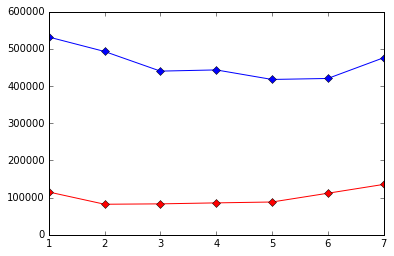

In [32]:
#review x-asix
day_review_collection_1 = df_r_count_review.select("Int_Day_of_Week").collect()
#review y-asix
number_review_collection_1 = df_r_count_review.select("Number_of_Reviews").collect()

#tip x-asix
day_tip_collection_1 = df_r_count_tip.select("Int_Day_of_Week").collect()
#tip y-asix
number_tip_collection_1 = df_r_count_tip.select("Number_of_tips").collect()


plt.plot(day_review_collection_1, number_review_collection_1, \
         color='blue', marker='D', linestyle='solid')

plt.plot(day_tip_collection_1, number_tip_collection_1,\
         color='red', marker='D', linestyle='solid')

### Section 7a:  Tableau Graphs for Restaurants Reviews vs Tips (2009 - 2017)

The result from the data we see a major difference between the days Reviews and Tips were writte for Restaurant categories

From Reviews standpoint, we see that the peak of Reviews are during Sunday to Monday, there was a decline on Tuesday, but a rise on Wednesday. The decline occurs from Thursday to Friday, but an increase on Saturday. However, both Sunday and Monday amount of reviews are the highest of the entire week in compare to weekends. 

From Tips standpoint, we see that the peak of Tips is on Friday and Saturday, with weekdays Monday to Thursday the lowest at almost a constant line after taking a drip from Sunday. 

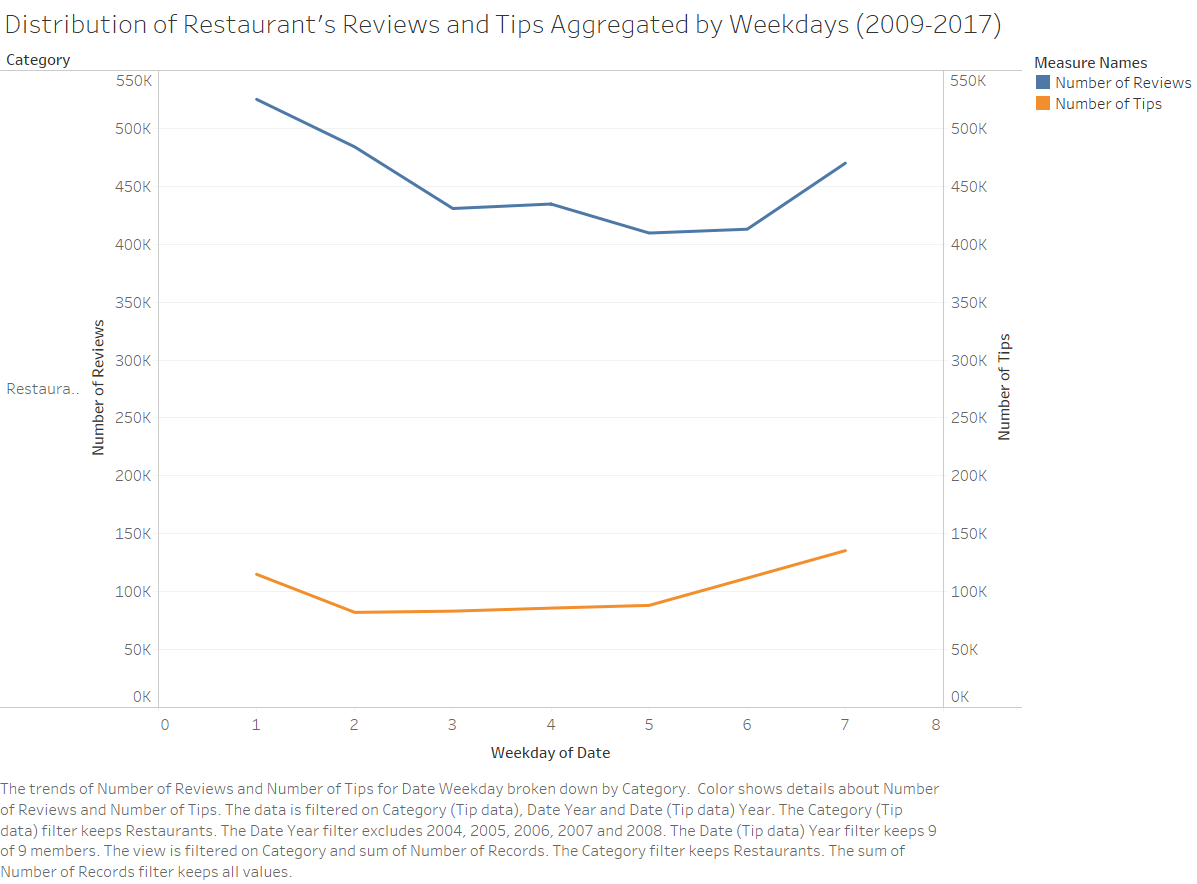

### Section 8: Aggregate Yelp users' written Shopping reviews
* We need to undertand the total amount of reviews for shopping
* The queries below profiles the number of reviews written for shopping in day of the week
* The days of weeks are then arranged from Sunday (as integer 1) to saturday (as integer 7)

In [33]:
df_s_count_review = spark.sql("""
SELECT Day_of_week, Int_Day_of_Week, count(business_id) AS Number_of_Reviews
FROM d_filter_review
WHERE category = "Shopping"
GROUP BY Day_of_Week, Int_Day_of_Week
ORDER BY Int_Day_of_Week
""")
df_s_count_review.show()

+-----------+---------------+-----------------+
|Day_of_week|Int_Day_of_Week|Number_of_Reviews|
+-----------+---------------+-----------------+
|     Sunday|              1|            52692|
|     Monday|              2|            55838|
|    Tuesday|              3|            56369|
|  Wednesday|              4|            57290|
|   Thursday|              5|            54821|
|     Friday|              6|            53810|
|   Saturday|              7|            53826|
+-----------+---------------+-----------------+



### Section 8a: Aggregate Yelp users' written Shopping tips
* Just like __Reviews__, we need to understand the total amount of tips for shopping
* The queries below profiles the number of __Tips__ written for __Shopping__ in day of the week
* The days of weeks are then arranged from Sunday (as integer 1) to Saturday (as integer 7)

In [34]:
df_s_count_tip = spark.sql("""
SELECT Day_of_week, Int_Day_of_Week, count(business_id) AS Number_of_tips
FROM d_filter_tip
WHERE category = "Shopping"
GROUP BY Day_of_Week, Int_Day_of_Week
ORDER BY Int_Day_of_Week
""")
df_s_count_tip.show()

+-----------+---------------+--------------+
|Day_of_week|Int_Day_of_Week|Number_of_tips|
+-----------+---------------+--------------+
|     Sunday|              1|         12368|
|     Monday|              2|          9777|
|    Tuesday|              3|          9729|
|  Wednesday|              4|         10090|
|   Thursday|              5|         10008|
|     Friday|              6|         11821|
|   Saturday|              7|         15887|
+-----------+---------------+--------------+



### Section 8b: Setting X-axis and Y-axis for Shopping
* The queries below is setting elements that are needed for both x-axis and y-axis

To create the visuals in our notebook using the Python module matplotlib. The purpose and goal is to set x-axis as day in the week and y-axis as the amount of reviews and tips

The review line graph will be in color: __Blue__

The tips line graph will be in the color: __Red__ 

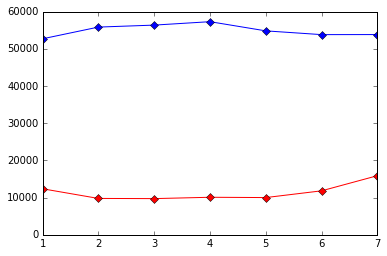

In [35]:
df_s_count_review.createOrReplaceTempView("shopping_review_count")
df_s_count_tip.createOrReplaceTempView("shopping_tip_count")          
#review x-asix
day_review_collection_2 = df_s_count_review.select("Int_Day_of_Week").collect()
#review y-asix
number_review_collection_2 = df_s_count_review.select("Number_of_Reviews").collect()

#tip x-asix
day_tip_collection_2 = df_s_count_tip.select("Int_Day_of_Week").collect()
#tip y-asix
number_tip_collection_2 = df_s_count_tip.select("Number_of_tips").collect()


plt.plot(day_review_collection_2, number_review_collection_2, \
         color='blue', marker='D', linestyle='solid')

plt.plot(day_tip_collection_2, number_tip_collection_2,\
         color='red', marker='D', linestyle='solid')

### Section 8c:  Tableau Graphs for Shopping Reviews vs Tips (2009 - 2017)

The result from the data we see a major difference in between the days Reviews and Tips were written for Shopping categories

From Reviews standpoint, we see that the peak of Reviews for Shopping is Wednesday

From Tips standpoint, we see that the peak of Tips for Shopping is on Friday and Saturday, with weekdays Monday to Thursday the lowest at almost a constant line after taking a drip from Sunday. 

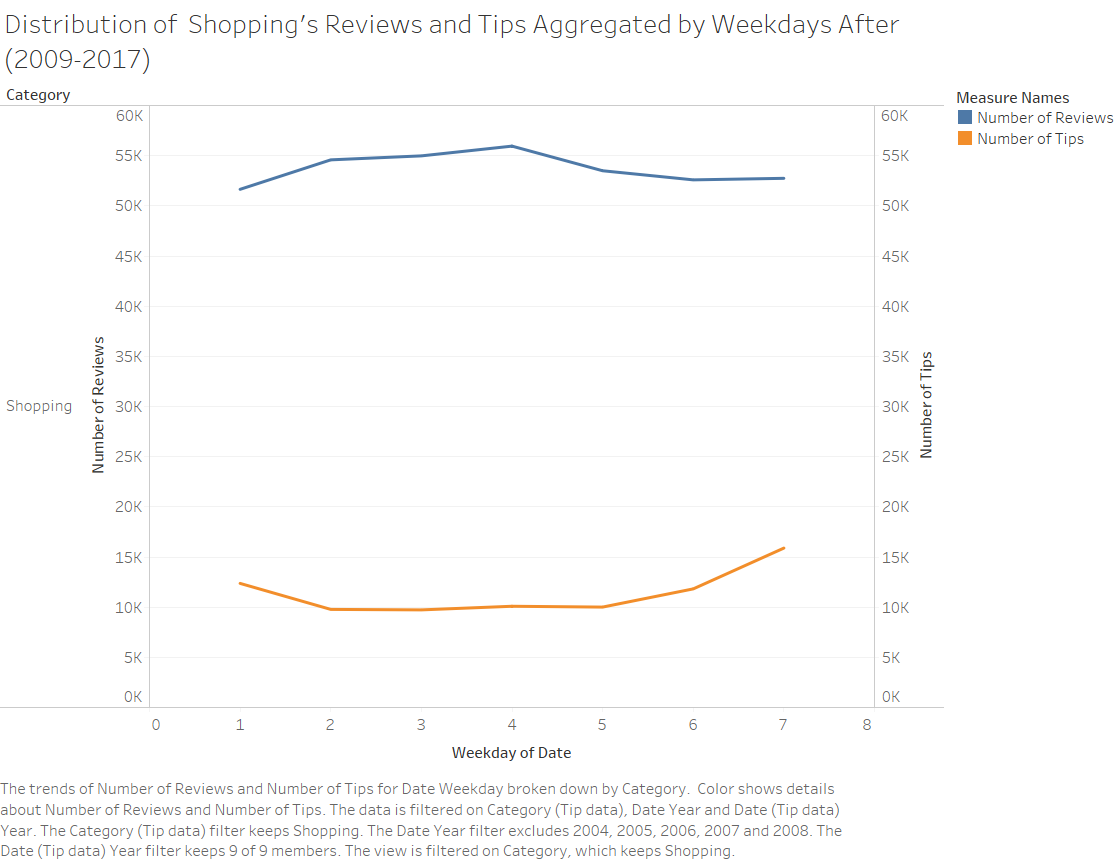

### Section 9: Aggregate Automotive Yelp user written review days to integers 
* Before we create comparison graph for Automotive, we need to show the number of reviews within days of week
* The days of weeks are then arranged from Sunday (as integer 1) to saturday (as integer 7)

In [36]:
df_a_count_review = spark.sql("""
SELECT Day_of_week, Int_Day_of_Week, count(business_id) AS Number_of_Reviews
FROM d_filter_review
WHERE category = "Automotive"

GROUP BY Day_of_Week, Int_Day_of_Week
ORDER BY Int_Day_of_Week
""")
df_a_count_review.show()

+-----------+---------------+-----------------+
|Day_of_week|Int_Day_of_Week|Number_of_Reviews|
+-----------+---------------+-----------------+
|     Sunday|              1|            20484|
|     Monday|              2|            25777|
|    Tuesday|              3|            29389|
|  Wednesday|              4|            30221|
|   Thursday|              5|            29184|
|     Friday|              6|            28848|
|   Saturday|              7|            27148|
+-----------+---------------+-----------------+



### Section 9a: Aggregate Automotive Yelp user written tip days to integers 
* Before we create comparison graph for Automotive, we need to show the number of tips within days of week
* The days of weeks are then arranged from Sunday (as integer 1) to saturday (as integer 7)

In [37]:
df_a_count_tip = spark.sql("""
SELECT Day_of_week, Int_Day_of_Week, count(business_id) AS Number_of_tips
FROM d_filter_tip
WHERE category = "Automotive"
GROUP BY Day_of_Week, Int_Day_of_Week
ORDER BY Int_Day_of_Week
""")
df_a_count_tip.show()

+-----------+---------------+--------------+
|Day_of_week|Int_Day_of_Week|Number_of_tips|
+-----------+---------------+--------------+
|     Sunday|              1|          3192|
|     Monday|              2|          4009|
|    Tuesday|              3|          4081|
|  Wednesday|              4|          4118|
|   Thursday|              5|          4077|
|     Friday|              6|          4509|
|   Saturday|              7|          5064|
+-----------+---------------+--------------+



In [38]:
df_a_count_review.createOrReplaceTempView("automotive_review_count")
df_a_count_tip.createOrReplaceTempView("automotive_tip_count")          

### Section 9b: Setting X-axis and Y-axis for Automotive:

The purpose of the following query is to form a sample and give us a better idea of what the actual graph would look like

To create the visuals in our notebook using the Python module matplotlib. The purpose and goal is to set __X-axis__ as day in the week and __Y-axis__ as the amount of __Reviews__ and __Tips__

* The query below sets __X-axis__ as day in a week and __Y-axis__ as amount of __Reviews__ and __Tips__ 
* The review line graph will be in color: Blue<br/>
* The tips line graph will be in the color: Red 

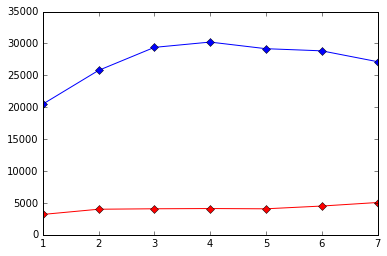

In [39]:
#review x-asix
day_review_collection_3 = df_a_count_review.select("Int_Day_of_Week").collect()
#review y-asix
number_review_collection_3 = df_a_count_review.select("Number_of_Reviews").collect()

#tip x-asix
day_tip_collection_3 = df_a_count_tip.select("Int_Day_of_Week").collect()
#tip y-asix
number_tip_collection_3 = df_a_count_tip.select("Number_of_tips").collect()


plt.plot(day_review_collection_3, number_review_collection_3, \
         color='blue', marker='D', linestyle='solid')

plt.plot(day_tip_collection_3, number_tip_collection_3,\
         color='red', marker='D', linestyle='solid')

### Section 9c: Tableau Graphs for Automotive: Reviews vs Tips 

The result from the data we see a major difference in between the days Reviews and Tips were written for Automotives 

From Reviews standpoint, we see that the peak of Reviews are during Tuesdays and Wednesdays, the lowest point was during Sundays to Mondays

From Tips standpoint, we see that the peak of Tips is on Friday and Saturday, with weekdays Monday to Thursday the lowest at almost a constant line after starting out at it's lowest on Sunday

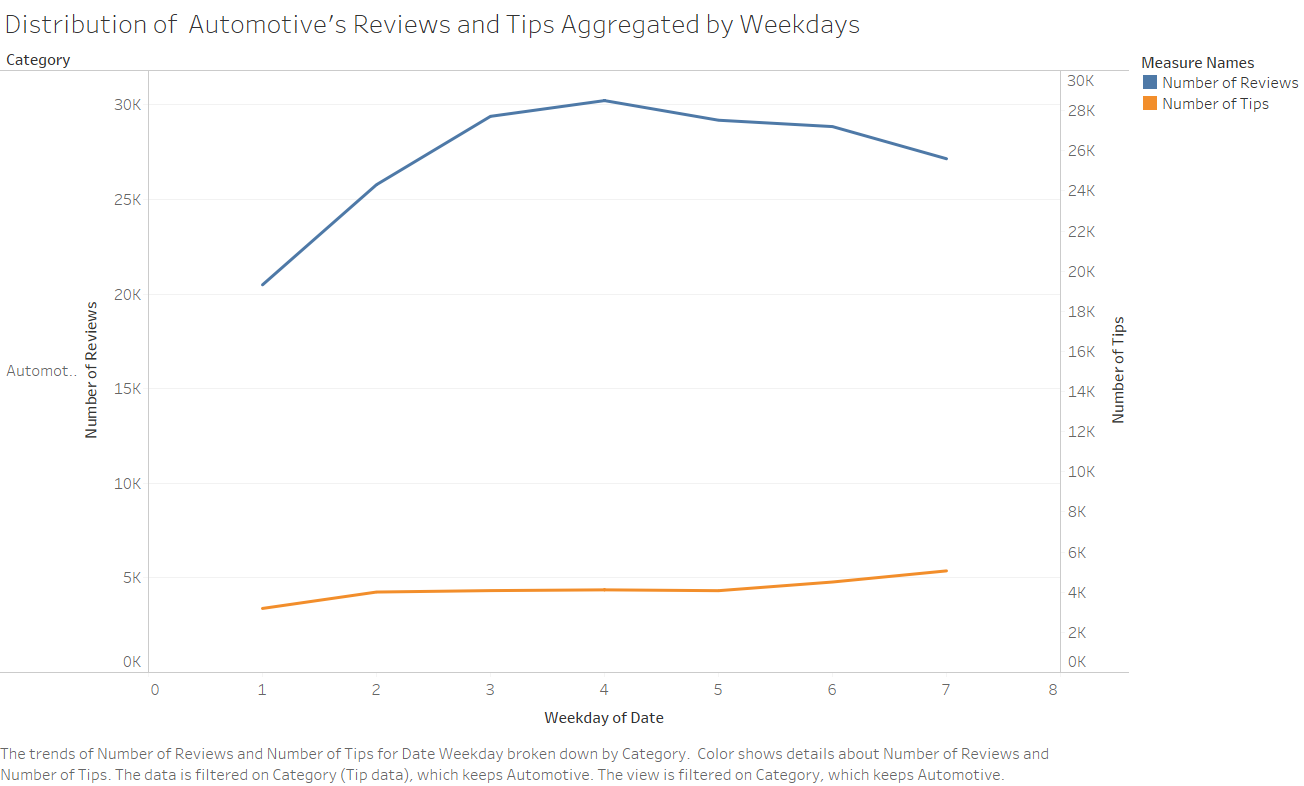

### Section 10: Tableau Graphs for Nightlife: Reviews vs Tips

The result from the data we see a major difference in between the days Reviews and Tips were written.

From Reviews standpoint, we see that the peak of Reviews are during Sunday to Monday, the decline starts from Tuesday until Friday with a huge rise on Saturday

From Tips standpoint, we see that the peak of Tips is on Friday and Saturday, with weekdays Monday to Thursday the lowest at almost a constant line after taking a drip from Sunday

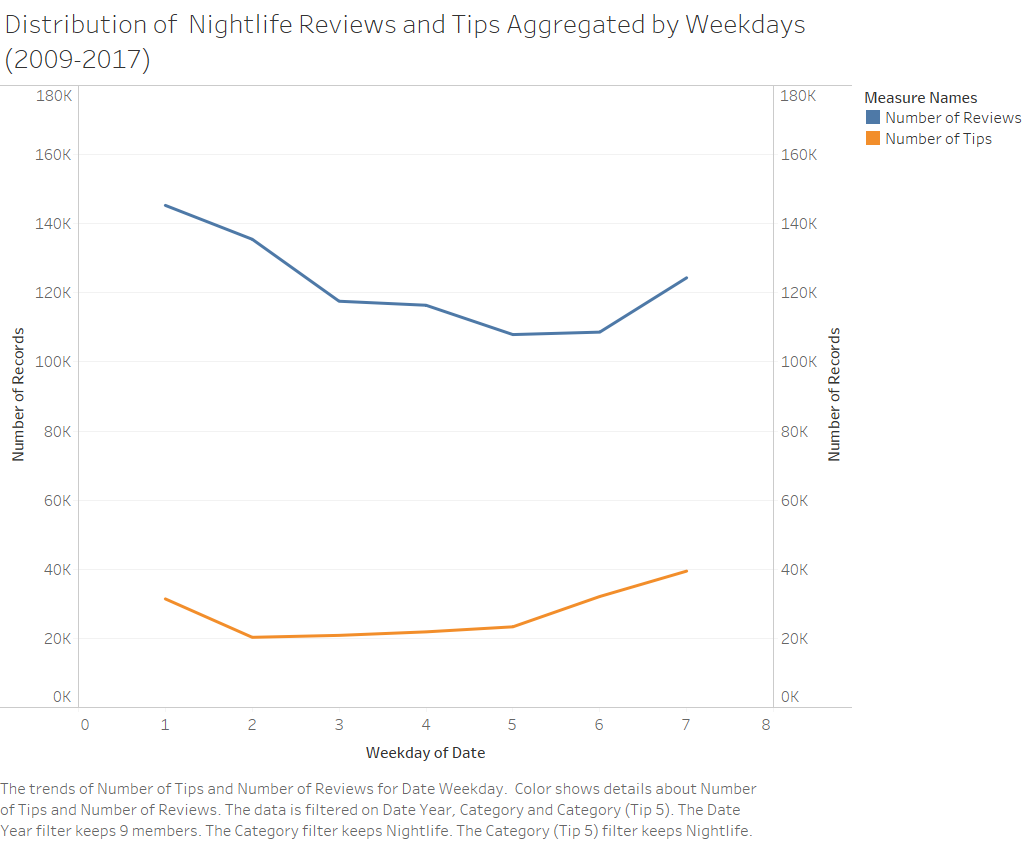

### Section 11: Tableau Graphs for Beauty & Spa: Reviews vs Tips

The result from the data we see a major difference in between the days Reviews and Tips were written for Beauty & Spa 

From Reviews standpoint, we see that the peak of Reviews is on Wednesday with a slight decrease and a slight increase as the week progresses to weekend at a constant line

From Tips standpoint, we see that the peak of Tips is from Thursday to Saturday, with weekdays Monday to Thursday the lowest at almost a constant line after taking a drip from Sunday. 

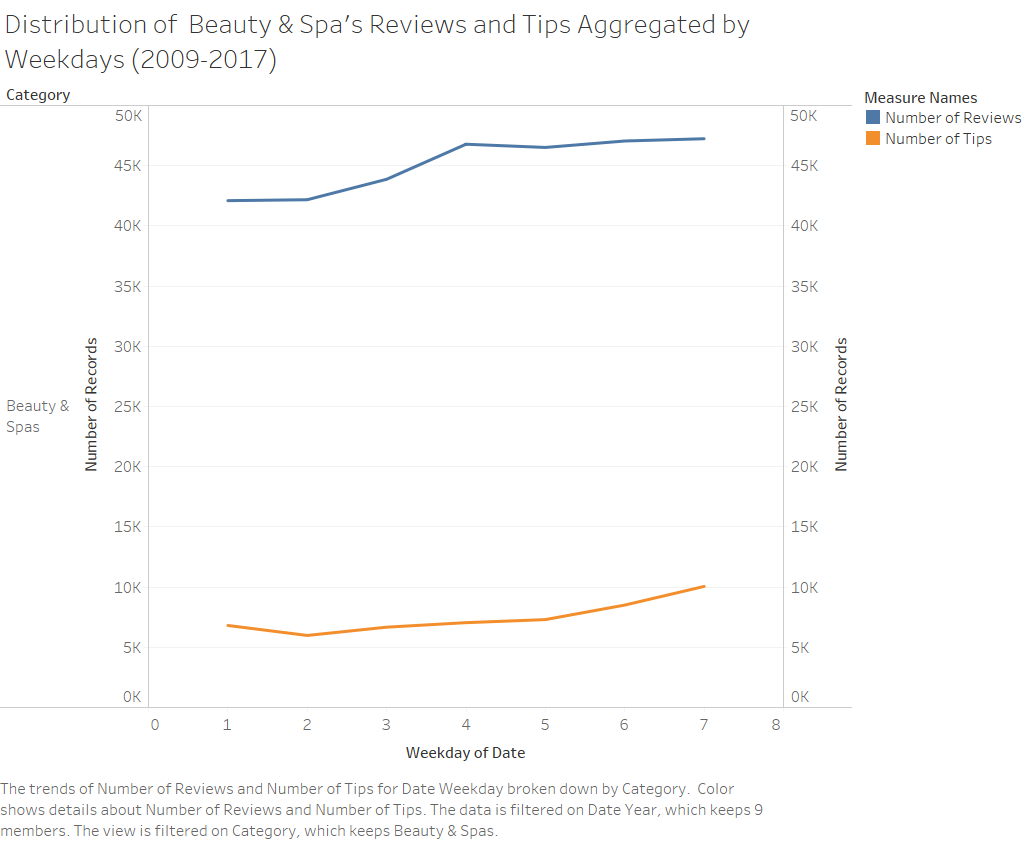

### Section 12: Comparing business reviews and tips' distribution side by side

This side-by-side comparison is meant for readers to see the distribution in written reviews and tips across 3 business categories as an example <br/>
The first graph represents the __Review__ and __Tip__ patterns for Restaurant.<br/>
The second graph represents the __Review__ and __Tip__ patterns for Shopping.<br/>
The third graph represents the __review and tip__ patterns for Automotive.

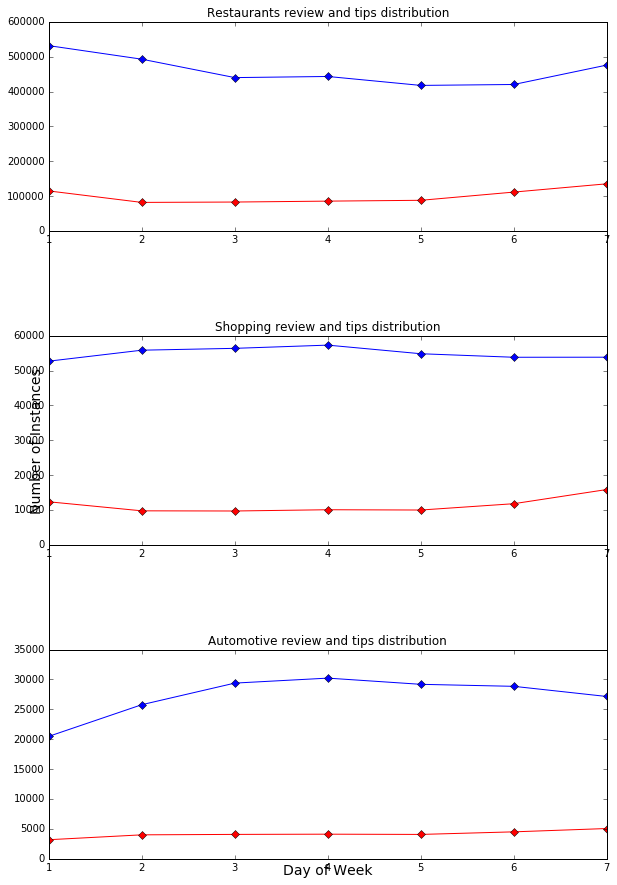

In [40]:
fig = plt.figure(figsize=(10,15))
#Edit sizing, labels, gridlines, title, legend.
#plt.title("Total Number of Reviews and Tips", fontsize = 18)
plt.ylabel("Number of Instances",fontsize=14)
plt.xlabel("Day of Week",fontsize=14)
plt.xticks([])
plt.yticks([])
#1 is for each year shows

# "Pattern for Restaurants:"
restaurants = fig.add_subplot(311)
restaurants.plot(day_review_collection_1, number_review_collection_1, \
         color='blue', marker='D', linestyle='solid')
restaurants.plot(day_tip_collection_1, number_tip_collection_1,\
         color='red', marker='D', linestyle='solid')
restaurants.set_title('Restaurants review and tips distribution')

#restaurants.show()
# "Pattern for Shopping:"
shopping = fig.add_subplot(312)
shopping.plot(day_review_collection_2, number_review_collection_2, \
         color='blue', marker='D', linestyle='solid')
shopping.plot(day_tip_collection_2, number_tip_collection_2,\
         color='red', marker='D', linestyle='solid')
shopping.set_title('Shopping review and tips distribution')
#shopping.show()
# "Pattern for Automotive:"
automotive = fig.add_subplot(313)
automotive.plot(day_review_collection_3, number_review_collection_3, \
         color='blue', marker='D', linestyle='solid')
automotive.plot(day_tip_collection_3, number_tip_collection_3,\
         color='red', marker='D', linestyle='solid')
automotive.set_title('Automotive review and tips distribution')

fig.subplots_adjust(hspace=.5)
plt.show()

### Section 13: Filter Nightlife Reviews (sanity check) 

In order for us to check the percentage of overlapping data within the chosen categories, cell __Section 13__ and __Section 13a__ performs filtering on category __Nightlife__ and __Restaurants__

This query is to filter out all the written reviews that is under "Nightlife" cateogry

This step is crucial because we needed to make sure we have extracted the correct data. Then, performs a sanity check of our data <br/>
After we have extracted written reviews for both __Nightlife__ and __Restaurants__, we then can further analyze the percentage of overlapping datas under these two categories

In [41]:
df_n_review = spark.sql("""
SELECT *
FROM d_filter_review
WHERE category = "Nightlife"
""")
df_n_review.show(5)

+--------------------+--------------------+---------+----------+-----------+---------------+
|         business_id|                name| category|      date|Day_of_Week|Int_Day_of_Week|
+--------------------+--------------------+---------+----------+-----------+---------------+
|8QWPlVQ6D-OExqXoa...|   Vegas Pub Crawler|Nightlife|2014-09-24|  Wednesday|              4|
|z8oIoCT1cXz7gZP5G...|Milliken Bar & Re...|Nightlife|2013-05-01|  Wednesday|              4|
|RtUvSWO_UZ8V3Wpj0...|KINKA IZAKAYA ORI...|Nightlife|2012-12-03|     Monday|              2|
|28adZ4lsuUeVB2aWz...|Prohibition Gastr...|Nightlife|2012-10-19|     Friday|              6|
|Eox_Qq74oaFZ-Yjth...|          The Sister|Nightlife|2011-07-18|     Monday|              2|
+--------------------+--------------------+---------+----------+-----------+---------------+
only showing top 5 rows



### Section 13a: Filter Restaurants Reviews (sanity check) 

This query is to filter out all the written reviews that is under "Restaurants" cateogry

In [42]:
df_r_review = spark.sql("""
SELECT *
FROM d_filter_review
WHERE category = "Restaurants"
""")
df_r_review.show(5)

+--------------------+-------------+-----------+----------+-----------+---------------+
|         business_id|         name|   category|      date|Day_of_Week|Int_Day_of_Week|
+--------------------+-------------+-----------+----------+-----------+---------------+
|0W4lkclzZThpx3V65...|   Schwartz's|Restaurants|2016-05-28|   Saturday|              7|
|AEx2SYEUJmTxVVB18...|   Wilensky's|Restaurants|2016-05-28|   Saturday|              7|
|VR6GpWIda3SfvPC-l...|    Tuck Shop|Restaurants|2016-05-28|   Saturday|              7|
|CKC0-MOWMqoeWf6s-...|Lester's Deli|Restaurants|2016-05-28|   Saturday|              7|
|ACFtxLv8pGrrxMm6E...|    Five Guys|Restaurants|2016-05-28|   Saturday|              7|
+--------------------+-------------+-----------+----------+-----------+---------------+
only showing top 5 rows



### Section 14: Creating and joining tables: Nightlife and Restaurant reviews

* The query below extract the business_ids of overlapping data from Nightlife and Restaurant dataframes. This step in crucial to find the number of overlapping data in Nightlife and Restaurant.

In [43]:
df_n_review.createOrReplaceTempView("df_nightlife_review")
df_r_review.createOrReplaceTempView("df_restaurant_review")
df_overlap_restaurant_nightlife = spark.sql("""
SELECT N.business_id, COUNT(N.name)
FROM df_nightlife_review AS N
INNER JOIN df_restaurant_review AS R ON N.business_id = R.business_id
GROUP BY N.business_id
""")
df_overlap_restaurant_nightlife.show(5)

+--------------------+-----------+
|         business_id|count(name)|
+--------------------+-----------+
|0859wfd1BQHG46Zpw...|      50176|
|1hBmklxIBhw9nu9Nj...|         81|
|2vBo1wWJckBnGOHhx...|       4356|
|4lCTd6-EzOuKl4YbH...|        900|
|74QS_MlNR1eKf6fhL...|        529|
+--------------------+-----------+
only showing top 5 rows



### Section 14a: Checking amount of reviews in overlapping businesses

Analayze and check the number of overlapping reviews in __Restaurant__ and __Nightlife__ to ensure the accuracy of our result.

In [44]:
df_overlap_restaurant_nightlife.createOrReplaceTempView("df_overlap_restaurant_nightlife")
df_overlap_in_restaurant = spark.sql("""
SELECT COUNT(R.business_id) AS Number_of_Reviews
FROM df_restaurant_review AS R
INNER JOIN df_overlap_restaurant_nightlife AS B ON R.business_id = B.business_id
""")
df_overlap_in_restaurant.show()

+-----------------+
|Number_of_Reviews|
+-----------------+
|           716743|
+-----------------+



In [45]:
df_overlap_in_nightlife = spark.sql("""
SELECT N.business_id
FROM df_nightlife_review AS N
INNER JOIN df_overlap_restaurant_nightlife AS B ON N.business_id = B.business_id
""")
print("The number of overlapping restaurant and nightlife is:"), df_overlap_in_nightlife.count()

The number of overlapping restaurant and nightlife is: 716743


### Section 14b: Percentage of overlapping reviews: Restaurant & Nightlife

* This query prints the result of overlapped reviews 
* With the percentage of overlapped number of reviews in restaurant and nightlife, we see the accuracy in our data knowing how much is and is not overlapped.

In [46]:
print "Percentage of overlapped number of reviews for restaurants: ", round(float(df_overlap_in_nightlife.count())/float(df_r_review.count())*100,2)
print "Percentage of overlapped number of reviews for nightlife: ", round(float(df_overlap_in_nightlife.count())/float(df_n_review.count())*100,2)

Percentage of overlapped number of reviews for restaurants:  22.25
Percentage of overlapped number of reviews for nightlife:  81.69


### Section 14c: Result of overlapping data: Nightlife and Restaurants
Now that we have all the data we need, we wil use __Bar graph__ for visualization to show overlapping written reviews of Nightlife and Restaurants. With the data showing 22.25% of data in Restaurant overlapped with data from Nightlife. We can see that the review pattern in nightlife category has an influence over the review pattern in restaurant. Furthermore, the Nightlife category shows 81.69% of data are overlapped with the data from Restaurant. With the majority of data in Nightlife category greatly influenced by the review pattern in Rstaurant, the comparison of review distribution patterns between Nightlife and Restaurant show striking similarities, which does not help in seeing differences in the review patterns in these two categories.<br>
Therefore, we decided to move onto finding and testing the percentage of overlapping data between review data in Shopping and Beauty & Spa categories.
* Orange = Overlapping Reviews Percentage
* Blue = Non-overlapping Reviews Percentage


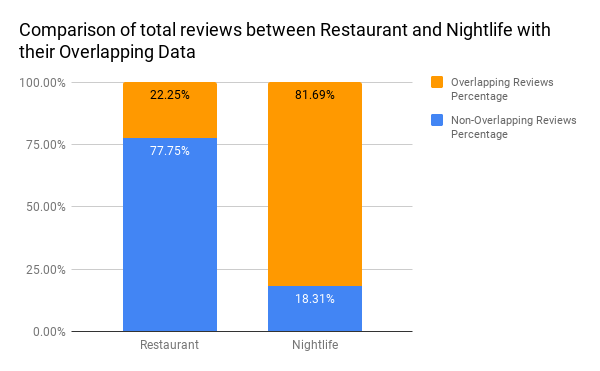

### Section 15: Extract Shopping data
We start profiling data to find and compare the overlapping data between Shopping and Beauty & Spa.

* The query below extracts review data for __Shopping__

In [47]:
df_s_review = spark.sql("""
SELECT *
FROM d_filter_review
WHERE category = "Shopping"
""")
df_s_review.show(5)

+--------------------+--------------------+--------+----------+-----------+---------------+
|         business_id|                name|category|      date|Day_of_Week|Int_Day_of_Week|
+--------------------+--------------------+--------+----------+-----------+---------------+
|13nKUHH-uEUXVZylg...|      Tidy's Flowers|Shopping|2011-02-16|  Wednesday|              4|
|RWGI8u00x5GghYCEz...|      Marché Atwater|Shopping|2011-10-14|     Friday|              6|
|3uBrRcIhbhed1xftL...|American Furnitur...|Shopping|2015-08-23|     Sunday|              1|
|0g7Pr8OWl_t_7DUeY...|    Double Wings Art|Shopping|2014-02-03|     Monday|              2|
|OwYElCdiJ1IGKVJ4-...|Yonge Sheppard Ce...|Shopping|2012-12-04|    Tuesday|              3|
+--------------------+--------------------+--------+----------+-----------+---------------+
only showing top 5 rows



### Section 15a: Extract Beauty & Spa data 

The following query does the folowing: 

* Extract appropriate data for __Beauty & Spa__

In [48]:
df_b_review = spark.sql("""
SELECT *
FROM d_filter_review
WHERE category LIKE "Beauty%"
""")
df_b_review.show(5)

+--------------------+--------------------+-------------+----------+-----------+---------------+
|         business_id|                name|     category|      date|Day_of_Week|Int_Day_of_Week|
+--------------------+--------------------+-------------+----------+-----------+---------------+
|fdnNZMk1NP7ZhL-YM...|  Great Body Massage|Beauty & Spas|2012-10-23|    Tuesday|              3|
|AF_VU15nNsqIg7-y9...|    Buff Nail Lounge|Beauty & Spas|2011-01-06|   Thursday|              5|
|ByLGceeU4oxmwUDxe...|            VIKA SPA|Beauty & Spas|2012-05-10|   Thursday|              5|
|5-Gs-cUI_8-3Ykl9K...|      Splendid Nails|Beauty & Spas|2011-05-06|     Friday|              6|
|g-OTq2Jb7FRP7cYDU...|Natural Solutions...|Beauty & Spas|2012-04-15|     Sunday|              1|
+--------------------+--------------------+-------------+----------+-----------+---------------+
only showing top 5 rows



### Section 15b: Creating and joining tables: Shopping and Beauty and Spa

* The query below extract the business_ids of overlapping data from Shopping and Beauty & Spa dataframes. This step in crucial to find the number of overlapping data in Shopping and Beauty & Spa.

In [49]:
df_s_review.createOrReplaceTempView("df_shopping_review")
df_b_review.createOrReplaceTempView("df_beauty_review")
df_overlap_shopping_beauty = spark.sql("""
SELECT S.business_id, COUNT(S.name)
FROM df_shopping_review AS S
INNER JOIN df_beauty_review AS B ON S.business_id = B.business_id
GROUP BY S.business_id
""")
df_overlap_shopping_beauty.show(5)

+--------------------+-----------+
|         business_id|count(name)|
+--------------------+-----------+
|10dD5L3JI17V2shf-...|        729|
|2_gVD4XlAfq1d1biO...|        361|
|5Claj4Q84-QagC16l...|         16|
|5Rduolg9SjUpg39hT...|        121|
|UhEhLSJrPRoiYWdHf...|      13456|
+--------------------+-----------+
only showing top 5 rows



### Section 15c: Find the number of overlapping reviews using business_id of overlapping businesses

* We test both number of overlapping reviews in shopping and Beauty & Spa to check if the number is correct

In [50]:
df_overlap_shopping_beauty.createOrReplaceTempView("df_overlap_shopping_beauty")
df_overlap_in_shopping = spark.sql("""
SELECT COUNT(S.business_id) AS  Number_of_Overlapping_Businesses
FROM df_shopping_review AS S
INNER JOIN df_overlap_shopping_beauty AS O ON S.business_id = O.business_id
""")
df_overlap_in_shopping.show()

+--------------------------------+
|Number_of_Overlapping_Businesses|
+--------------------------------+
|                           36016|
+--------------------------------+



In [51]:
df_overlap_in_beauty = spark.sql("""
SELECT COUNT(B.business_id) AS Number_of_Overlapping_beauty_spa
FROM df_beauty_review AS B
INNER JOIN df_overlap_shopping_beauty AS O ON B.business_id = O.business_id
""")
df_overlap_in_beauty.show()

+--------------------------------+
|Number_of_Overlapping_beauty_spa|
+--------------------------------+
|                           36016|
+--------------------------------+



### Section 15d: Percentage of overlapping reviews: Shopping and Beauty & Spa

* This query prints the result of overlapped reviews 
* With the percentage of overlapped number of reviews in shopping and beauty & spa, we see the accuracy in our data knowing how much is and is not overlapped.

In [52]:
print "Percentage of overlapped number of reviews for shopping: ", round(float(df_overlap_in_beauty.count())/float(df_s_review.count())*100,2)
print "Percentage of overlapped number of reviews for beauty & spa: ", round(float(df_overlap_in_beauty.count())/float(df_b_review.count())*100,2)

Percentage of overlapped number of reviews for shopping:  0.0
Percentage of overlapped number of reviews for beauty & spa:  0.0


### Section 15e: Result of overlapping data: Shopping and Beauty & Spa

Now that we have all the data we need, we will use __Bar graph__ for visualization to show overlapping written reviews of Shopping and Beauty & Spa. Unlike the comparison of Restaurant and Nightlife, Shopping shows only a 9.36% of data overlapped from Beauty & Spa while Beauty & Spa shows only a 11.32% of data overlapped from Shopping. With low percentage of data overlapped, the two categories vary in their review distribution pattern, which helps us to analyze the differences in the data.

* Orange = Overlapping Reviews Percentage
* Blue = Non-overlapping Reviews Percentage


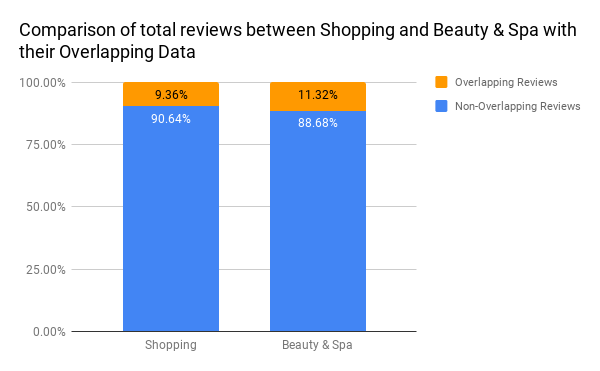

### Part 5: Analysis and Limitations

Our initial assumption has been proven wrong as the review and tip patterns for these five business categories show variations depending on the category and the patterns do not show increases from Monday to Sunday. However, we found the data points for Restaurant category to be higher toward the beginning and end of the aggregated week, where our entire data are aggregated by day of week. Meanwhile, the data points for the Shopping category shows more reviews toward the beginning of the week and more tips toward the end of the week. Meanwhile, the data points for Automotive are higher during the weekdays. For the two additional categories we have added (Nightlife, Beauty & Spas), data points for Nightlife category to be higher in the beginning and ending. Meanwhile, the data for the Beauty and Spa cateogry shows the highest from the middle of the week towards to end of the week, and the lowest in the beginning of the week. From these information, Yelp can benefit by incorporating user's writing patterns depending on the category in Yelp's business planning.

The information we acquired from the data serve their purpose of showing the patterns of reviews and tips across days of week, and can potentially benefit Yelp from a company standpoint. However, due to certain limitations, we do not think businesses can have a significant benefit from these data. For instance, by tracking distributions across reviews and tips written throughout the week, we are able to track Yelp user's activity and have a deeper understanding of the frequency and usage across all Yelp users throughout the week. Although, we do not understand the content of per reviews and tips, one benefit both Yelp and Businesses can benefit from is when to run advertisement on their applications. Through user's frequency and days of interaction with Yelp applications, we know that there are certain days that the applications are at its peak in usage. This gives Yelp and businesses an opportunity to market and promote their product or service. 

An interesting pattern we discovered is when comparing the days in both Reviews to Tips are written, we saw Reviews being all-time high from Sunday to Monday. However, from Tips data, we noticed that the all-time high is during Friday and Saturday. Our analysis is we think that there is a slight delay for days of the review is written after Yelpers have visited the business.

* As for Tips, the Tips tool can only be utilized through the mobile phone. We think Tips are written on the day of, as our data justifies our assumption